# Pneumonia datavisualization

This notebook will work on given dataset and try to retreive key points of interests inside of it

**Main goals are**: 

    - Display image
    - Reshape image without loss of important data
    - Determining important data
    - Treat and format the dataset

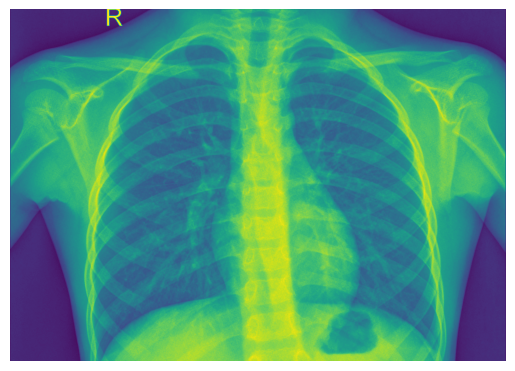

In [2]:
# Open image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Open the image
image_path = "../../datasets/chest_Xray/test/NORMAL/IM-0001-0001.jpeg"  # Change this to your image file path
img = mpimg.imread(image_path)

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axes
plt.show()

## Now we try to convert all images so they get the same size

In [19]:
import os
import pandas as pd
from PIL import Image

def resize_image(image_path, size):
    """
    Resize the image to the specified size without changing aspect ratio.
    """
    img = Image.open(image_path)
    img.thumbnail(size, Image.LANCZOS)
    background = Image.new('RGB', size, (0, 0, 0))  # Black background
    background.paste(img, ((size[0] - img.size[0]) // 2, (size[1] - img.size[1]) // 2))
    return background

def image_to_dataframe(image):
    """
    Convert an image to a DataFrame representing its grayscale values.
    """
    img_gray = image.convert("L")
    data = list(img_gray.getdata())
    df = pd.DataFrame(data, columns=["Pixel_Value"])
    return df

def process_images(imgs_folder, dest_folder_img, dest_folder_dfs):
    """
    Process all images in the given folder.
    """
    # Get all image file names
    image_files = [f for f in os.listdir(imgs_folder) if os.path.isfile(os.path.join(imgs_folder, f))]
    
    # Find the size of the largest image
    max_width = 0
    max_height = 0
    for image_file in image_files:
        with Image.open(os.path.join(imgs_folder, image_file)) as img:
            width, height = img.size
            max_width = max(max_width, width)
            max_height = max(max_height, height)
    
    # Process each image
    for image_file in image_files:
        with Image.open(os.path.join(imgs_folder, image_file)) as img:
            # Resize the image
            img_resized = resize_image(os.path.join(imgs_folder, image_file), (max_width, max_height))
            
            # Convert the resized image to grayscale DataFrame
            df = image_to_dataframe(img_resized)
            
            # Save the processed image
            img_resized.save(os.path.join(dest_folder_img, "processed_img_" + image_file))
            # Optionally, you can save the DataFrame to a CSV file
            df.to_csv(os.path.join(dest_folder_dfs, "processed_df_" + image_file.split('.')[0] + ".csv"), index=False)


# Set source and destination folders
imgs_folder = "../../datasets/chest_Xray/test/PNEUMONIA"
dest_folder_img = "../../datasets/chest_Xray/local_test/_processed_imgs"
dest_folder_dfs = "../../datasets/chest_Xray/local_test/_processed_dfs"

# Create destination folder if it doesn't exist
if not os.path.exists(dest_folder_img):
    os.makedirs(dest_folder_img)

if not os.path.exists(dest_folder_dfs):
    os.makedirs(dest_folder_dfs)

# Process images
process_images(imgs_folder, dest_folder_img, dest_folder_dfs)

In [27]:
# Using a nice ploting lib
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

csv_files = [f for f in os.listdir(dest_folder_dfs) if os.path.isfile(os.path.join(dest_folder_dfs, f))]

images_sum = pd.DataFrame()

for csv_file in csv_files:
    csv_path = os.path.join(dest_folder_dfs, csv_file)
    df = pd.read_csv(csv_path)
    if images_sum.empty:
        images_sum = df
    else:
        images_sum += df




In [28]:
images_sum

,Pixel_Value
0,27
1,26
2,25
3,25
4,27
...,...
2911995,0
2911996,0
2911997,0
2911998,0


In [29]:
image = images_sum.values.reshape(1456, 2000)
image.max()

74449

In [30]:
image

array([[27, 26, 25, ...,  3,  0,  1],
       [24, 24, 24, ...,  3,  0,  1],
       [21, 22, 24, ...,  3,  0,  1],
       ...,
       [ 0, 10, 18, ...,  0,  0,  0],
       [ 4,  0,  1, ...,  0,  0,  0],
       [ 3,  0, 16, ...,  0,  0,  0]], dtype=int64)

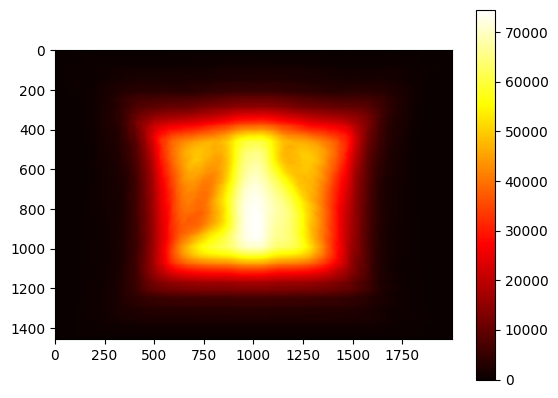

In [31]:

plt.imshow(image, cmap='hot')
plt.colorbar()

## The heatmap does not look like lungs x-ray

Data may have encountered bad transformation

In [40]:
import os
import pandas as pd
from PIL import Image

def resize_image(image_path, size):
    """
    Resize the image to the specified size while keeping the aspect ratio.
    """
    img = Image.open(image_path)
    img_resized = img.resize(size, Image.LANCZOS)
    return img_resized

def image_to_dataframe(image):
    """
    Convert an image to a DataFrame representing its grayscale values.
    """
    img_gray = image.convert("L")
    data = list(img_gray.getdata())
    df = pd.DataFrame(data, columns=["Pixel_Value"])
    return df

def process_images(imgs_folder, dest_folder_img, dest_folder_dfs):
    """
    Process all images in the given folder.
    """
    # Get all image file names
    image_files = [f for f in os.listdir(imgs_folder) if os.path.isfile(os.path.join(imgs_folder, f))]
    
    # Find the size of the largest image
    max_width = 2000
    max_height = 1456
    
    # Process each image
    for image_file in image_files:
        with Image.open(os.path.join(imgs_folder, image_file)) as img:
            # Resize the image
            img_resized = resize_image(os.path.join(imgs_folder, image_file), (max_width, max_height))
            
            # Convert the resized image to grayscale DataFrame
            df = image_to_dataframe(img_resized)
            
            # Save the processed image
            img_resized.save(os.path.join(dest_folder_img, "processed_img_" + image_file))
            # Optionally, you can save the DataFrame to a CSV file
            df.to_csv(os.path.join(dest_folder_dfs, "processed_df_" + image_file.split('.')[0] + ".csv"), index=False)


# Set source and destination folders
imgs_folder = "../../datasets/chest_Xray/test/NORMAL"
dest_folder_img = "../../datasets/chest_Xray/local_test/_processed_resize/_processed_imgs"
dest_folder_dfs = "../../datasets/chest_Xray/local_test/_processed_resize/_processed_dfs"

# Create destination folder if it doesn't exist
if not os.path.exists(dest_folder_img):
    os.makedirs(dest_folder_img)

if not os.path.exists(dest_folder_dfs):
    os.makedirs(dest_folder_dfs)

# Process images
process_images(imgs_folder, dest_folder_img, dest_folder_dfs)

In [2]:
# Using a nice ploting lib
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

dest_folder_dfs = "../../datasets/chest_Xray/local_test/_processed_resize/_processed_dfs"

csv_files = [f for f in os.listdir(dest_folder_dfs) if os.path.isfile(os.path.join(dest_folder_dfs, f))]

images_sum = pd.DataFrame()

for csv_file in csv_files:
    csv_path = os.path.join(dest_folder_dfs, csv_file)
    df = pd.read_csv(csv_path)
    if images_sum.empty:
        images_sum = df
    else:
        images_sum += df


In [3]:
images_sum

,Pixel_Value
0,27999
1,30851
2,32215
3,32160
4,32215
...,...
2911995,11399
2911996,11446
2911997,11603
2911998,11417


In [4]:
image = images_sum.values.reshape(1456, 2000)
image.max()

124724

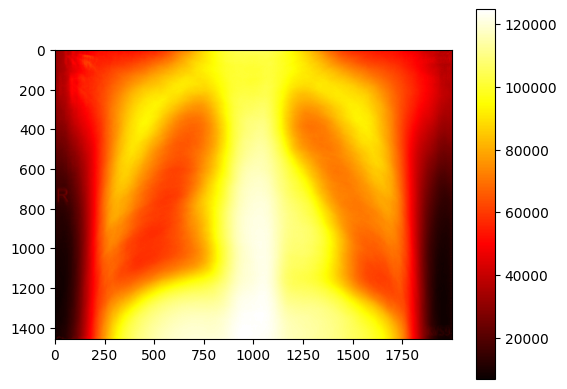

In [5]:
plt.imshow(image, cmap='hot')
plt.colorbar()

## Proportions looks good, we may have found a good way to format all data so they have the same size

We start looking at wich region of the image could be deleted to prevent bad interpretation

In [15]:
image_adjusted = images_sum.copy()
image_adjusted.max()

Pixel_Value    124724
dtype: int64

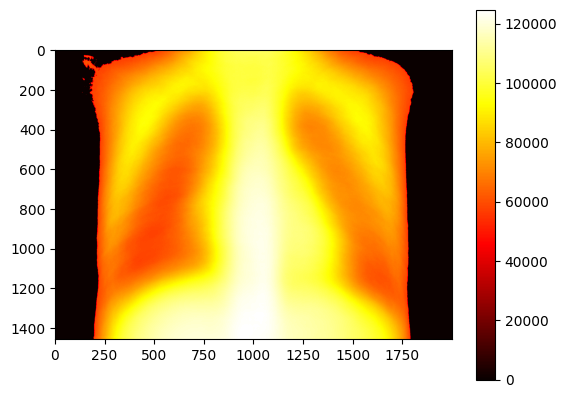

In [16]:
image_adjusted[image_adjusted < 57000] = 0


image_cropped = image_adjusted.values.reshape(1456, 2000)
plt.imshow(image_cropped, cmap='hot')
plt.colorbar()

In [18]:
import numpy as np
import pandas as pd

# Create a DataFrame with shape (1456, 2000)

df = image_cropped.copy()

# Define vertices of the triangles
triangle1_vertices = [(0, 0), (0, 650), (600, 0)]
triangle2_vertices = [(1456, 2000), (1300, 0), (2000, 500)]

# Create boolean masks for each triangle
def point_in_triangle(x, y, vertices):
    x1, y1 = vertices[0]
    x2, y2 = vertices[1]
    x3, y3 = vertices[2]
    area = 0.5 *(-x2*y3 + x1*(-y2+y3) + x3*(y1-y2) + x2*y1)
    s = 1/(2*area)*(y1*y3 - y1*y2 + (y2-y3)*x + (x3-x1)*y)
    t = 1/(2*area)*(y1*y2 - y1*y3 + (y3-y1)*x + (x1-x2)*y)
    return s > 0 and t > 0 and 1 - s - t > 0

mask1 = pd.DataFrame(np.zeros_like(df), index=df.index, columns=df.columns)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        mask1.iloc[i, j] = point_in_triangle(i, j, triangle1_vertices)

mask2 = pd.DataFrame(np.zeros_like(df), index=df.index, columns=df.columns)
for i in range(df.shape[0]):
    for j in range(df.shape[1]):
        mask2.iloc[i, j] = point_in_triangle(i, j, triangle2_vertices)

# Set points in triangles to 0
df[mask1 | mask2] = 0

# Display the modified DataFrame
plt.imshow(df, cmap='hot')
plt.colorbar()

C:\Users\chapu\AppData\Local\Temp\ipykernel_18948\1930058592.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mask1.iloc[i, j] = point_in_triangle(i, j, triangle1_vertices)
C:\Users\chapu\AppData\Local\Temp\ipykernel_18948\1930058592.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  mask1.iloc[i, j] = point_in_triangle(i, j, triangle1_vertices)
C:\Users\chapu\AppData\Local\Temp\ipykernel_18948\1930058592.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'False' has dtype incompatible with int64, please explicitly cast to a compatible dtype firs

KeyboardInterrupt: 